In [1]:
import pickle

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

pickle_in = open("X_val.pickle","rb")
X_val = pickle.load(pickle_in)

pickle_in = open("Y_val.pickle","rb")
Y_val = pickle.load(pickle_in)

In [2]:
import os
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import warnings

dense_layers = [1]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers: 
    for layer_size in layer_sizes:
         for conv_layer in conv_layers:
            model =  Sequential()

            model.add(Conv2D(layer_size, (3,3), input_shape = (28,28,1), padding = 'Same'))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size = (2,2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3,3), padding = 'Same'))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size = (2,2)))
                model.add(Dropout(0.25))
                
            model.add(Flatten()) # converts ourr 3D feature maps to 1D feature vectors

            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))

            model.add(Dense(10)) # output layer
            model.add(Activation("softmax"))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0

In [5]:

model.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics=["accuracy"])

### Data Augmentation

In [6]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=8,  # randomly rotate images
        zoom_range = 0.5, # Randomly zoom image 
        width_shift_range=0.08,  # randomly shift images horizontally 
        height_shift_range=0.08,  # randomly shift images vertically 
        shear_range = 0.5,
        ) 

datagen.fit(X_train)

# fitting model
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size= 32),
                              epochs = 10, validation_data = (X_val, Y_val), steps_per_epoch= X_train.shape[0] // 32, validation_steps = X_val.shape[0] // 32)

Epoch 1/10
1050/1050 [==============================] - 12s 12ms/step - loss: 0.5523 - acc: 0.8203 - val_loss: 0.0663 - val_acc: 0.9792
Epoch 2/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.2248 - acc: 0.9300 - val_loss: 0.0620 - val_acc: 0.9808
Epoch 3/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.1696 - acc: 0.9465 - val_loss: 0.0401 - val_acc: 0.9865
Epoch 4/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.1433 - acc: 0.9551 - val_loss: 0.0366 - val_acc: 0.9873
Epoch 5/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.1297 - acc: 0.9593 - val_loss: 0.0365 - val_acc: 0.9879
Epoch 6/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.1180 - acc: 0.9641 - val_loss: 0.0278 - val_acc: 0.9896
Epoch 7/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.1092 - acc: 0.9660 - val_loss: 0.0275 - val_acc: 0.9906
Epoch 8/10
1050/1050 [==========================

In [7]:
model.save("64x3-CNN.model")

In [8]:
y_pred = model.predict(X_val)

In [9]:
X_val.shape

(8400, 28, 28, 1)

In [10]:
X_train.shape

(33600, 28, 28, 1)

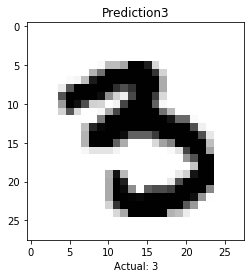

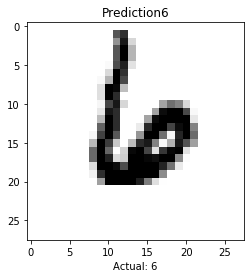

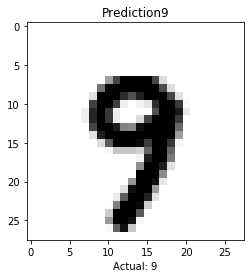

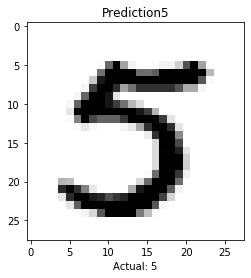

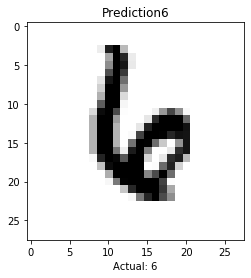

In [11]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.grid(False)
    plt.imshow(X_val[i][:,:,0], cmap = plt.cm.binary)
    plt.xlabel("Actual: " + str(np.argmax(Y_val[i])))
    plt.title("Prediction" + str(np.argmax(y_pred[i])))
    plt.show()